In [1]:

import open3d as o3d
import copy
import numpy as np
import surface_acquisition as surface
import visualization as vis

In [2]:
folder = "Pacients"
number = 74
patient = "BR0" + f"{number}"

digital_twin = f"{folder}/{patient}/Segment_4.stl"
digital_twin_1 = f"{folder}/{patient}/try.stl"
surface_scan_path = "Pacients/BR074/SS74/Scan 1.obj"
surface_digital_twin_noisy = f"{folder}/{patient}/Surface.ply"

In [3]:
pcd = surface.sample_mesh(digital_twin, 2000000)
rotated_pcd, rotation, vector = surface.rotation_pcd(pcd)
diameter = surface.computation_diameter(rotated_pcd)
x_max, y_max, z_max, x_min, y_min, z_min = surface.bouding_points(rotated_pcd)

::       Reading mesh
::       Sampling Mesh
::       Rotation of the pcd
::      z_min and half_x: (-12.16541601677865, 8.756043542066337)
::      z_min and half_x: (0.0, 0.0)
::       Computing Diameter
::      Diameter of the pcd is: 517.9640323848531
::       Computing limits
::      Bounding Limits Max:[(197.95351939810746, 91.04803331160844, 216.61079408180245)
::      Bounding Limits Min:[(197.95351939810746, 163.1647109858411, 0.0)]


In [4]:
all_colors = [[1, 0.706, 0],  # Orange 
            [1, 0, 0],        # Red
            [1, 0, 0],        # Red
            [1, 0.5, 0],      # Orange
            [1, 0.5, 0],      # Orange
            [1, 1, 0],        # Yellow
            [1, 1, 0],        # Yellow
            [0, 1, 0],        # Green
            [0, 1, 0],        # Green
            [0, 0, 1],        # Blue
            [0, 0, 1],        # Blue
            [0.5, 0, 0.5],    # Indigo
            [0.5, 0, 0.5],    # Indigo
            [1, 0, 1],        # Violet
            [1, 0, 1],        # Violet
            [0.8, 0.6, 0.1],  # Gold
            [0.8, 0.6, 0.1],  # Gold
            [1, 0.706, 0],    # Orange 
            [1, 0.706, 0]    # Orange 
            ]   

In [5]:
all_cameras = {
    "camera_1": [0, 0, diameter/2],
    "camera_2": [(-diameter/2), y_max-y_min +abs(y_max-y_min)/4, diameter/5], 
    "camera_3": [(diameter/2), y_max-y_min + abs(y_max-y_min)/4 , diameter/5], 
    "camera_4": [(diameter/2), -100, (diameter - 120) * np.cos(30)],  
    "camera_5": [-(diameter/2), -100, (diameter - 120) * np.cos(30)],  
    "camera_6": [(diameter - 320)* np.cos(35), -y_min + abs(y_max-y_min)/6, (diameter - 320)],  
    "camera_7": [-(diameter - 320)* np.cos(35), -y_min + abs(y_max-y_min)/6, (diameter - 320)],  
    "camera_8": [(diameter/3) + x_max/3, -y_min + abs(y_max-y_min)/6, (diameter/3) - 50],  
    "camera_9": [-(diameter/3)-x_min/3, -y_min + abs(y_max-y_min)/6, (diameter/3) - 50],  
    "camera_10": [(diameter/3), 0, (3*diameter/7)],  
    "camera_11": [-(diameter/3), 0, (3*diameter/7)],  
    "camera_12": [(0.22*diameter), -y_min + abs(y_max-y_min)/6, 0.5*diameter],  
    "camera_13": [-(0.22*diameter), -y_min + abs(y_max-y_min)/6, (0.5 *diameter)], 
    "camera_14": [(diameter/3), -y_min + abs(y_max-y_min)/6, (diameter/2)],  
    "camera_15": [-(diameter/3), -y_min + abs(y_max-y_min)/6, (diameter/2)],  
    "camera_16": [(2*diameter/5), -y_min + abs(y_max-y_min)/6, (diameter/4)],  
    "camera_17": [-(2*diameter/5), -y_min + abs(y_max-y_min)/6, (diameter/4)],
    "camera_18": [0, -y_min + 60, 1.5 * z_max]
}

In [7]:
surface.visualize_hpr(rotated_pcd, all_cameras, all_colors)

::       Computing Diameter
::      Diameter of the pcd is: 517.9640323848531
::       Computation of the box
::       Computing Diameter
::      Diameter of the pcd is: 517.9640323848531
::      Point Cloud Number 1-th Done
::      Point Cloud Number 2-th Done
::      Point Cloud Number 3-th Done
::      Point Cloud Number 4-th Done
::      Point Cloud Number 5-th Done
::      Point Cloud Number 6-th Done
::      Point Cloud Number 7-th Done
::      Point Cloud Number 8-th Done
::      Point Cloud Number 9-th Done
::      Point Cloud Number 10-th Done
::      Point Cloud Number 11-th Done
::      Point Cloud Number 12-th Done
::      Point Cloud Number 13-th Done
::      Point Cloud Number 14-th Done
::      Point Cloud Number 15-th Done
::      Point Cloud Number 16-th Done
::      Point Cloud Number 17-th Done
::      Point Cloud Number 18-th Done


In [6]:
pcd_surface = surface.final_pcd(rotated_pcd, all_cameras, all_colors, patient)

::       Computing Diameter
::      Diameter of the pcd is: 517.9640323848531
::      Point Cloud Number 1-th Done
::      Point Cloud Number 2-th Done
::      Point Cloud Number 3-th Done
::      Point Cloud Number 4-th Done
::      Point Cloud Number 5-th Done
::      Point Cloud Number 6-th Done
::      Point Cloud Number 7-th Done
::      Point Cloud Number 8-th Done
::      Point Cloud Number 9-th Done
::      Point Cloud Number 10-th Done
::      Point Cloud Number 11-th Done
::      Point Cloud Number 12-th Done
::      Point Cloud Number 13-th Done
::      Point Cloud Number 14-th Done
::      Point Cloud Number 15-th Done
::      Point Cloud Number 16-th Done
::      Point Cloud Number 17-th Done
::      Point Cloud Number 18-th Done
::       Finish Merged


In [7]:
vis.capture_video(mesh_path=None, pcd_path=None, pcd=pcd_surface, output_file="hidden_points_removal.avi", width=1920, height=1080, fps=30)

KeyboardInterrupt: 

In [14]:
pcd_surface_copy = copy.deepcopy(pcd_surface)

In [17]:
surface.visualize_surface_and_all(pcd_surface, rotated_pcd)

::       Computing limits
::      Bounding Limits Max:[(206.69918892526388, 79.19582706478411, 225.86513054231705)
::      Bounding Limits Min:[(206.69918892526388, 174.79343602456592, 12.706230813797674)]


In [6]:
# Given a x = k and bounded yy ans zz makes a plane
def make_plane(plane, y_max, y_min, z_max, z_min):
    y_range = np.linspace(y_min, y_max, 500)
    z_range = np.linspace(z_min, z_max, 500)

    plane_points = [[plane, y, z] for y in y_range for z in z_range]
    plane_cloud = o3d.geometry.PointCloud()
    plane_cloud.points = o3d.utility.Vector3dVector(plane_points)
    plane_cloud.paint_uniform_color((0,0,0))
    return plane_cloud

In [7]:
def visualize_plane_point_cloud(pcd, planes):
    _, y_max, z_max, _, y_min, z_min = surface.bouding_points(pcd)
    various_planes = {}
    for i, plane in enumerate(planes):
        various_planes[f'plane_{i}'] = make_plane(plane, y_max, -y_min, z_max, -z_min)
    
    # Visualize all planes and the point cloud
    all_geometries = [pcd] + list(various_planes.values())
    o3d.visualization.draw_geometries(all_geometries)

In [11]:
visualize_plane_point_cloud(rotated_pcd, [-150,-50,0,50,150])

::       Computing limits
::      Bounding Limits Max:[(223.99382638299068, 94.4597869105649, 266.96643431504117)
::      Bounding Limits Min:[(223.99382638299068, 174.41099978600604, 0.0)]


: 

In [ ]:
pcd_digital_twin_noisy = o3d.io.read_point_cloud(surface_digital_twin_noisy)

pcd = pcd_digital_twin_noisy.voxel_down_sample(voxel_size=0.5)

In [ ]:
cl, ind = pcd.remove_statistical_outlier(nb_neighbors=1000, std_ratio=1)

pcd_digital_twin = filter.display_inlier_outlier(pcd, ind)

In [ ]:
vis.visualize_save_surface_digital_twin(patient, pcd_digital_twin)

Dataset Uploading

In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import copy
import features
import filter

folder = "Pacients"
number = 74
patient = "BR0" + f"{number}"
surface_digital_twin_path = f"{folder}/{patient}/Surface.ply"
pcd = o3d.io.read_point_cloud(surface_digital_twin_path)

Downsample

In [2]:
voxel_down_pcd = pcd.voxel_down_sample(voxel_size=0.5)
# o3d.visualization.draw_geometries([voxel_down_pcd])

In [ ]:

uni_down_pcd = pcd.uniform_down_sample(every_k_points=20)
# o3d.visualization.draw_geometries([uni_down_pcd])

Outlier Removal

In [4]:
cl, ind = voxel_down_pcd.remove_statistical_outlier(nb_neighbors=200,
                                                        std_ratio=1.0)
filter.display_inlier_outlier(voxel_down_pcd, ind)

Showing outliers (red) and inliers (gray): 


PointCloud with 394975 points.

: 

In [ ]:
cl, ind = voxel_down_pcd.remove_radius_outlier(nb_points=5, radius=5)
filter.display_inlier_outlier(voxel_down_pcd, ind)

In [21]:
pcd_median = filter.median_filter(voxel_down_pcd, 7)

In [26]:
cl, ind = pcd_median.remove_statistical_outlier(nb_neighbors=100,
                                                        std_ratio=0.5)
inlier_cloud = filter.display_inlier_outlier(pcd_median, ind)
print(inlier_cloud)

Showing outliers (red) and inliers (gray): 
PointCloud with 375848 points.


2. Features Display

In [25]:
fpfh_digital_twin = features.fpfh(inlier_cloud, 0.5)
features.save_feature_image(inlier_cloud, fpfh_digital_twin, 0.5, "Features", patient)

Computing Fast Points Feature Histogram...
FPFH Done
Feature number 0-th
Feature number 1-th
Feature number 2-th
Feature number 3-th
Feature number 4-th
Feature number 5-th
Feature number 6-th


In [1]:
import deformation_graph
all_ids = [61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 73, 74, 76]

all_idsx = [[61], [62], [63], [64], [65], [66], [67], [68], [69], [71], [73], [74], [76]]
ids = [62]#, 74]

In [ ]:
# graph_twin, nodes_twin = graph_and_nodes(source, 1, 10)
# graph_scan, nodes_scan = graph_and_nodes(target, 1, 10)

# visualize_graph(nodes_twin, graph_twin)
# visualize_graph(nodes_scan, graph_scan)

[Open3D WARNING] Read geometry::Image failed: file extension bmp unknown


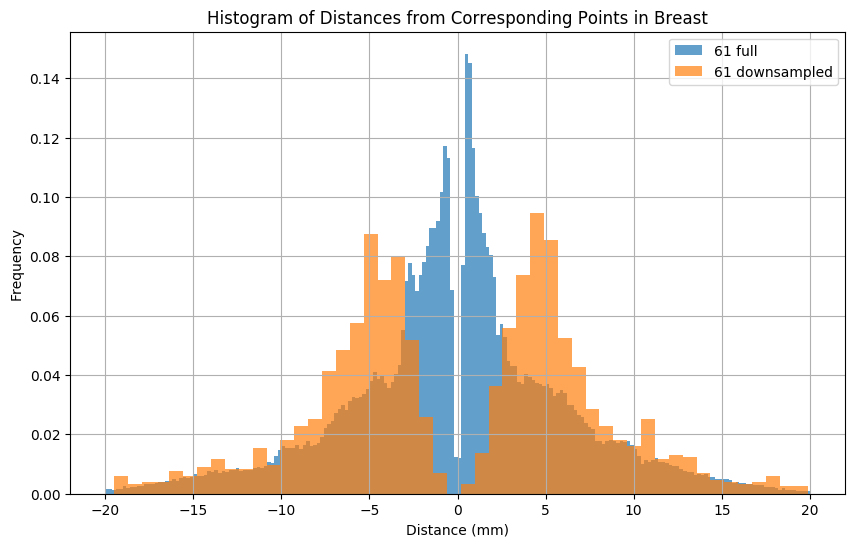

[Open3D WARNING] Read geometry::Image failed: file extension bmp unknown


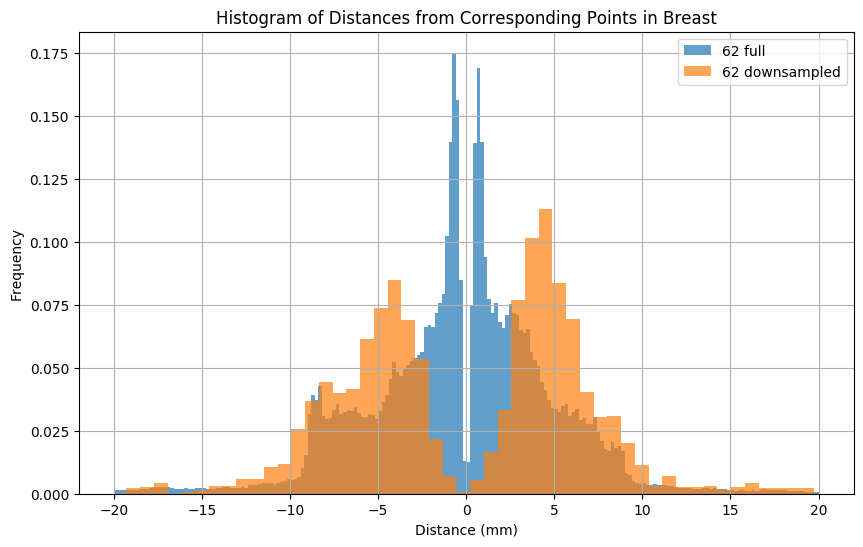

[Open3D WARNING] Read geometry::Image failed: file extension bmp unknown


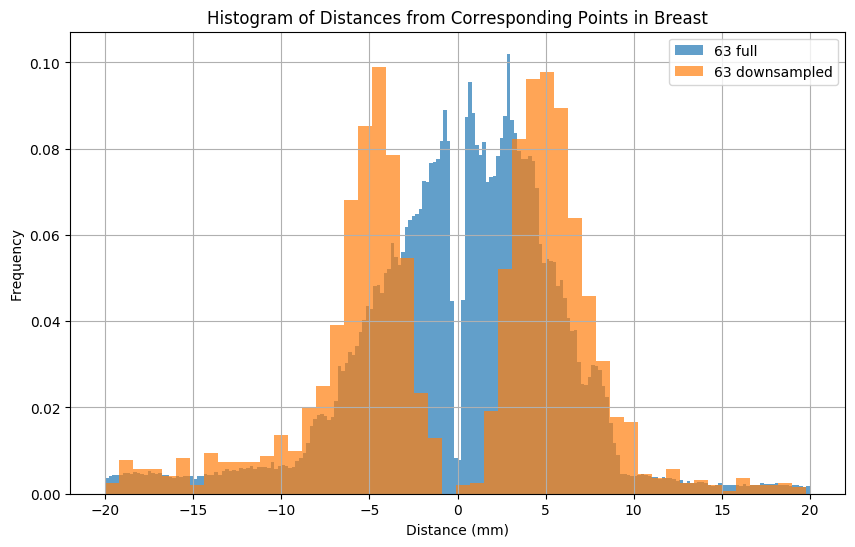

[Open3D WARNING] Read geometry::Image failed: file extension bmp unknown


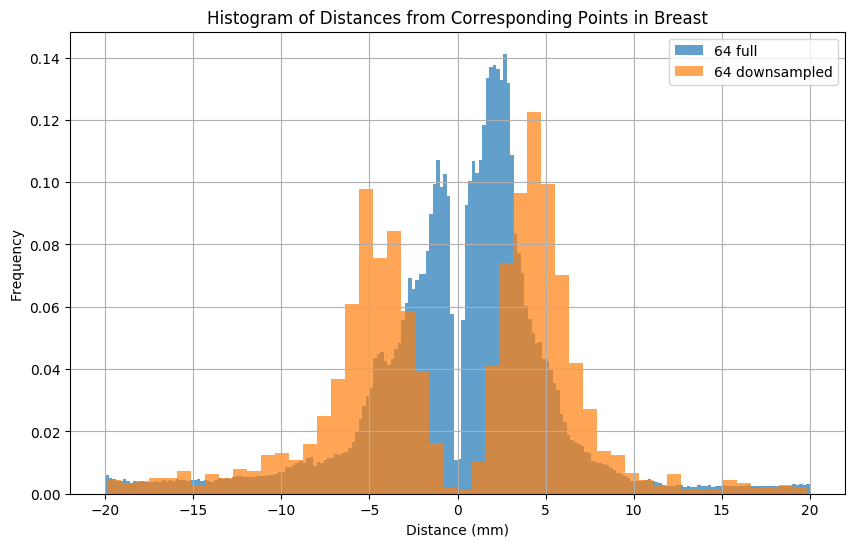

[Open3D WARNING] Read geometry::Image failed: file extension bmp unknown


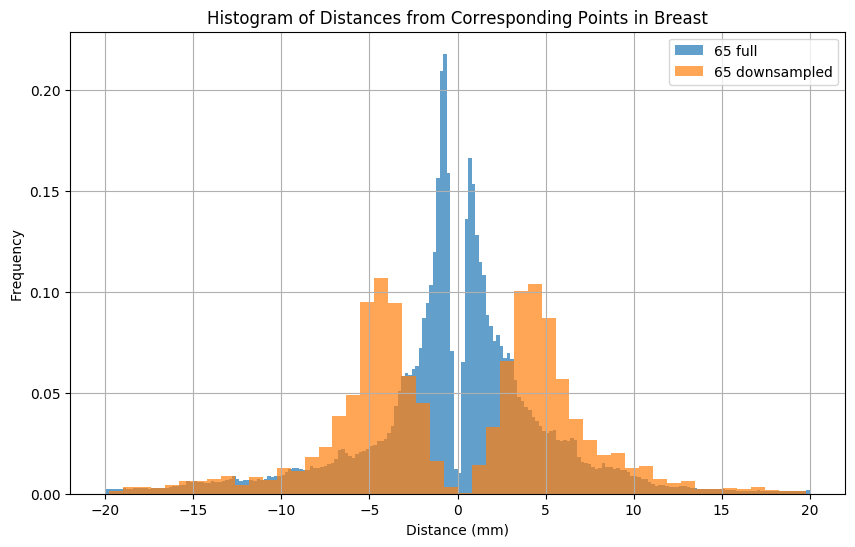

[Open3D WARNING] Read geometry::Image failed: file extension bmp unknown


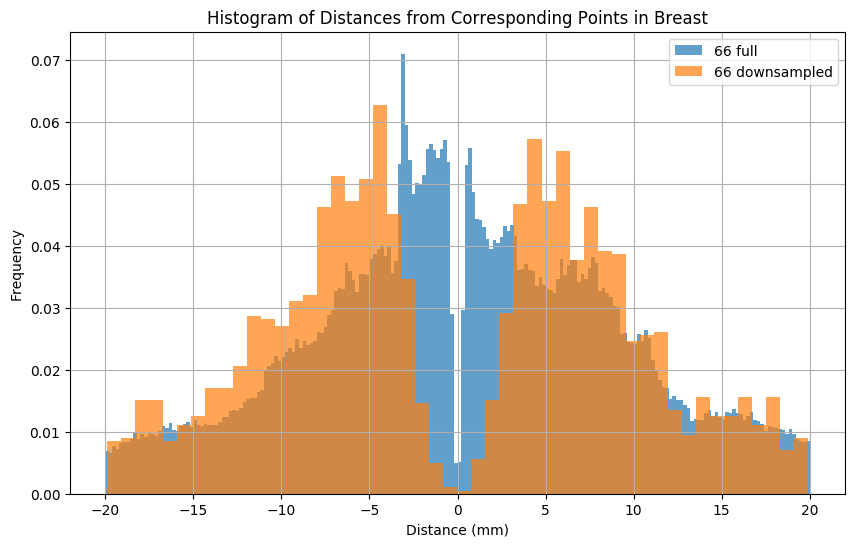

[Open3D WARNING] Read geometry::Image failed: file extension bmp unknown


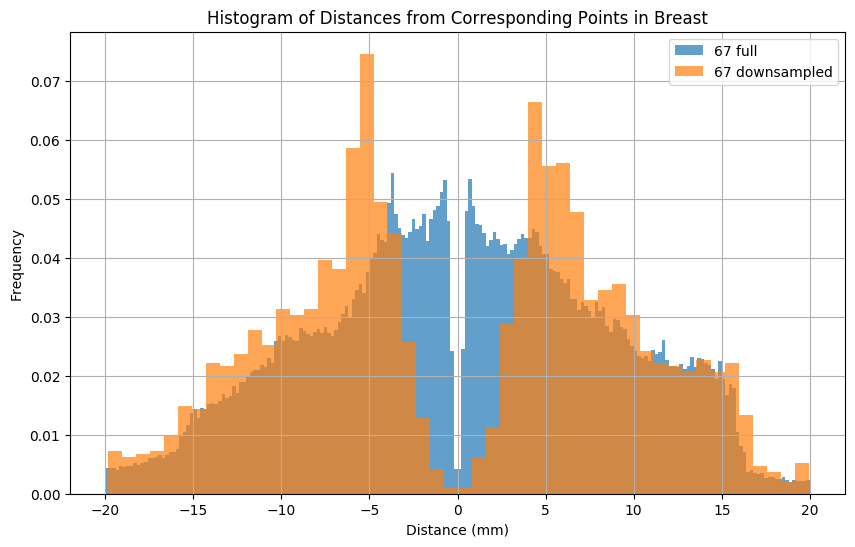

[Open3D WARNING] Read geometry::Image failed: file extension bmp unknown


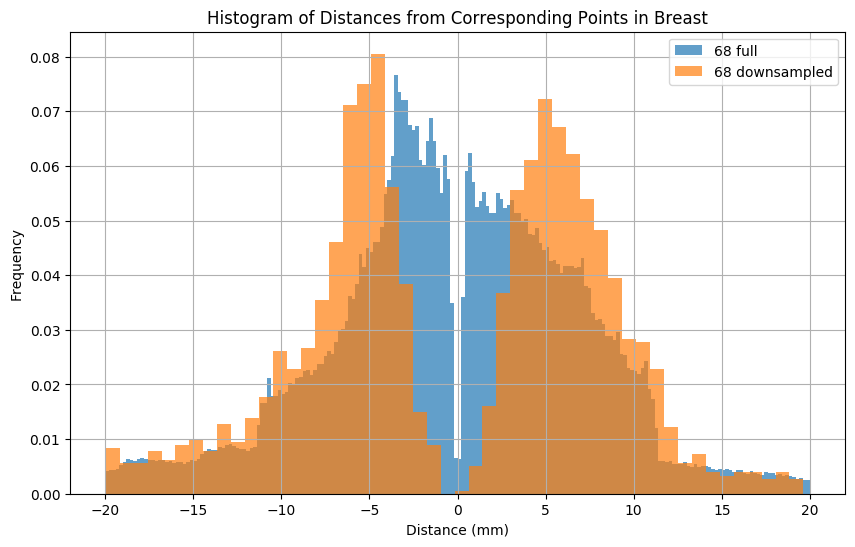

[Open3D WARNING] Read geometry::Image failed: file extension bmp unknown


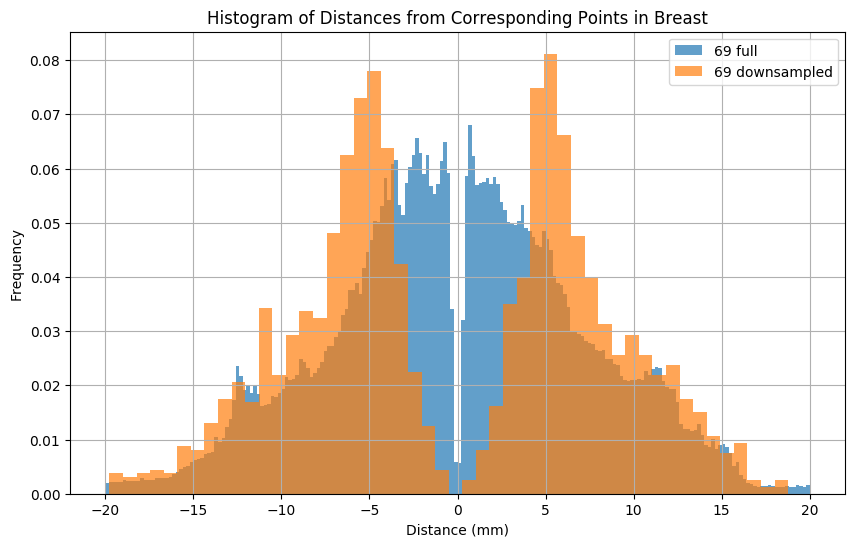

[Open3D WARNING] Read geometry::Image failed: file extension bmp unknown


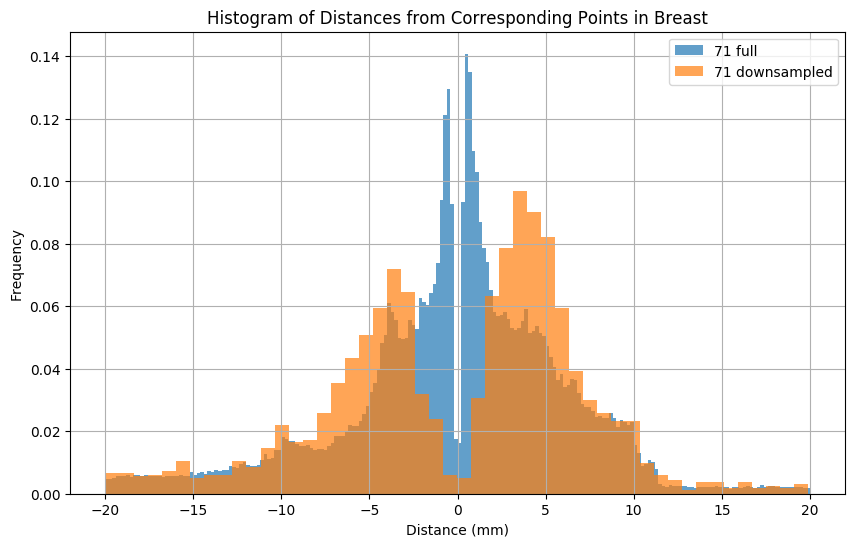

[Open3D WARNING] Read geometry::Image failed: file extension bmp unknown


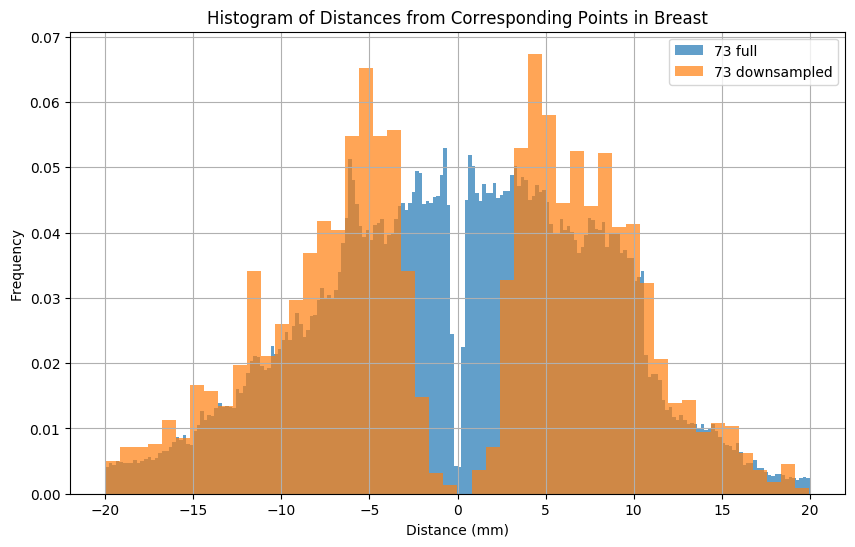

[Open3D WARNING] Read geometry::Image failed: file extension bmp unknown


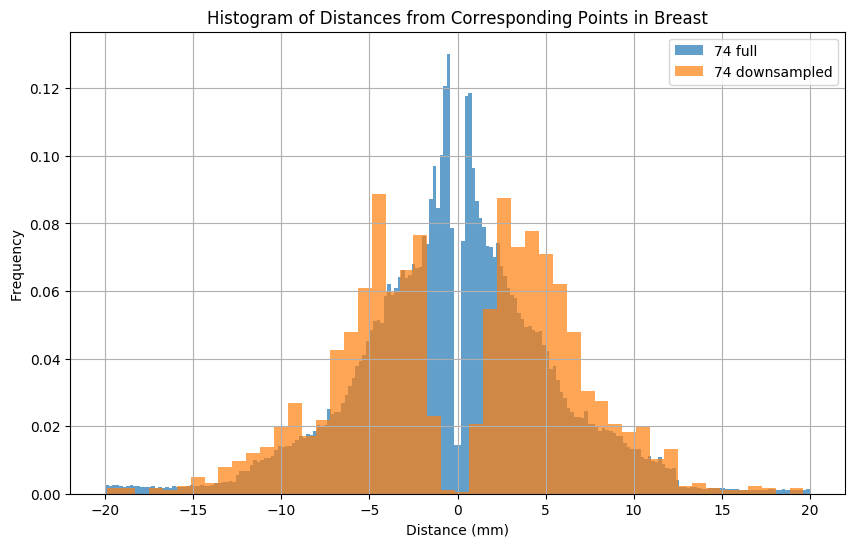

[Open3D WARNING] Read geometry::Image failed: file extension bmp unknown


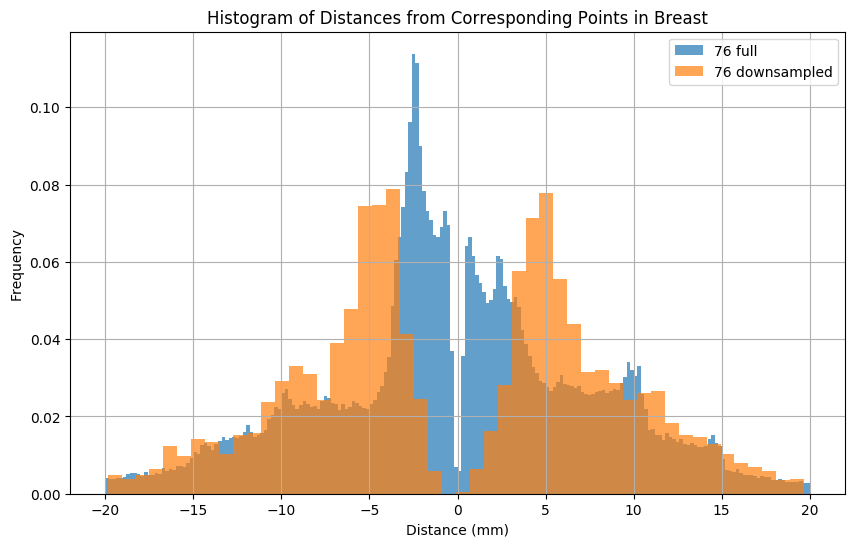

In [4]:
for id in all_idsx:
    deformation_graph.plot_histogram_distances(id)

In [5]:
deformation_graph.plot_distances(all_ids, True)

[Open3D WARNING] Read geometry::Image failed: file extension bmp unknown
[ 2.3009975  -1.21932201  0.69312515 ...  8.68138424 -6.80455335
 -1.81914988]
[Open3D WARNING] Read geometry::Image failed: file extension bmp unknown
[ 6.05262559 -7.13612889 -8.30183063 ...  7.73486264 -1.02249575
 10.24815093]
[Open3D WARNING] Read geometry::Image failed: file extension bmp unknown
[ 4.09875535 -2.72309958  3.12329686 ... -0.70656192  1.75197963
 -4.13221089]


: 

In [ ]:
deformation_graph.plot_correspondences(all_ids)

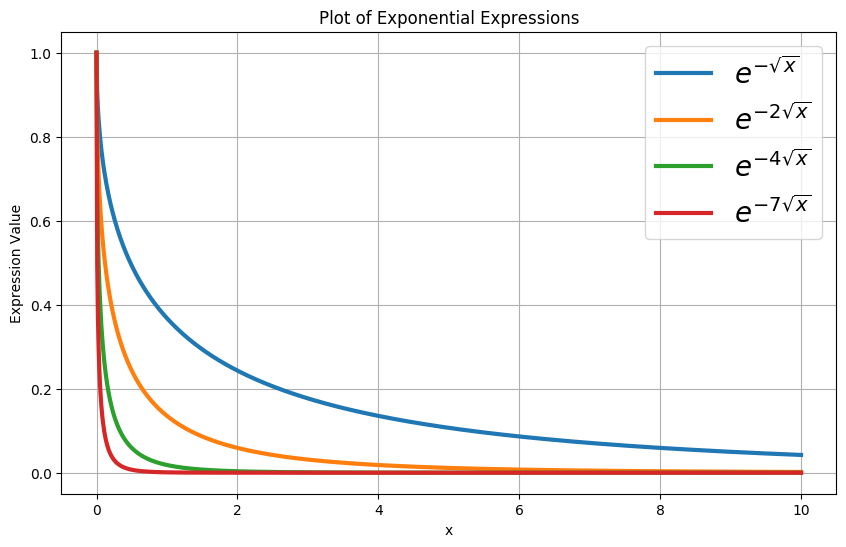

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values
x_values = np.linspace(0, 10, 1000)

# Compute the expressions
y_exp_1 = np.exp(-np.sqrt(x_values))
y_exp_2 = np.exp(-np.sqrt(x_values)*2)
y_exp_3 = np.exp(-np.sqrt(x_values)*4)
y_exp_4 = np.exp(-np.sqrt(x_values)*7)


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_exp_1, label=r'$e^{-\sqrt{x}}$', linewidth=3)
plt.plot(x_values, y_exp_2, label=r'$e^{-2\sqrt{x}}$', linewidth=3)
plt.plot(x_values, y_exp_3, label=r'$e^{-4\sqrt{x}}$', linewidth=3)
plt.plot(x_values, y_exp_4, label=r'$e^{-7\sqrt{x}}$', linewidth=3)

plt.xlabel('x')
plt.ylabel('Expression Value')
plt.title('Plot of Exponential Expressions')
plt.legend(fontsize=20)
plt.grid(True)
plt.show()

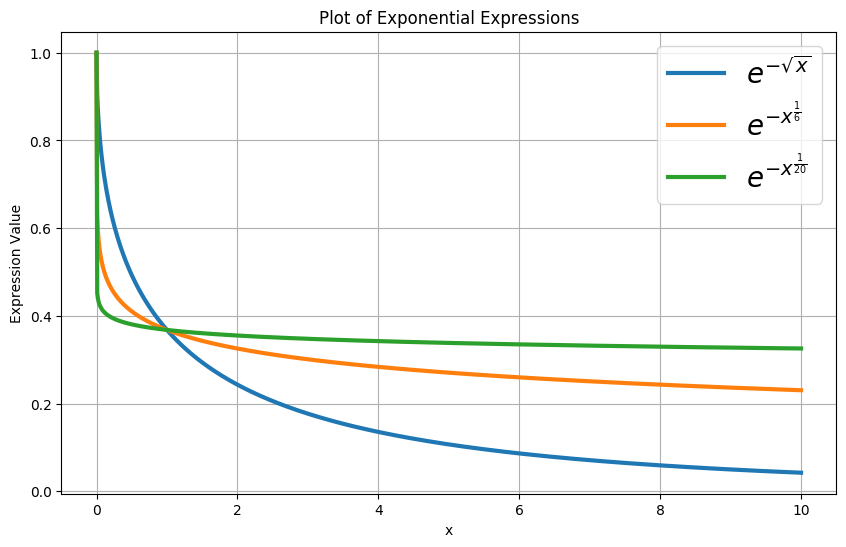

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values
x_values = np.linspace(0, 10, 1000)

# Compute the expressions
y_exp_1 = np.exp(-np.sqrt(x_values))
y_exp_6 = np.exp(-((x_values ** (1/6))))
y_exp_10 = np.exp(-((x_values ** (1/10))))
y_exp_20 = np.exp(-((x_values ** (1/20))))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_exp_1, label=r'$e^{-\sqrt{x}}$', linewidth=3)
plt.plot(x_values, y_exp_6, label=r'$e^{-{x}^{\frac{1}{6}}}$', linewidth=3)
plt.plot(x_values, y_exp_20, label=r'$e^{-{x}^{\frac{1}{20}}}$', linewidth=3)
plt.xlabel('x')
plt.ylabel('Expression Value')
plt.title('Plot of Exponential Expressions')
plt.legend(fontsize=20)
plt.grid(True)
plt.show()